In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [19]:
start= datetime.datetime(2015, 3, 27)  # The start of the year for example
end= datetime.datetime(2019, 4, 17)

In [20]:
ticker_1 = "MDT"
ticker_2 = "BSX"

In [21]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [22]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-10,89.349998,88.489998,88.720001,88.629997,5031400.0,88.629997
2019-04-11,89.199997,87.250000,89.199997,87.599998,7878900.0,87.599998
2019-04-12,88.070000,86.620003,88.000000,86.750000,7324200.0,86.750000
2019-04-15,87.290001,86.669998,87.129997,86.870003,5815900.0,86.870003
2019-04-16,87.544998,86.050003,87.510002,86.150002,8336194.0,86.150002


In [23]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-10,38.580002,38.189999,38.240002,38.360001,5896200,38.360001
2019-04-11,38.509998,37.869999,38.500000,37.919998,4887600,37.919998
2019-04-12,38.049999,37.570000,37.950001,37.730000,4800100,37.730000
2019-04-15,37.910000,37.490002,37.810001,37.810001,4554800,37.810001
2019-04-16,38.250000,35.599998,38.099998,36.169998,32876904,36.169998


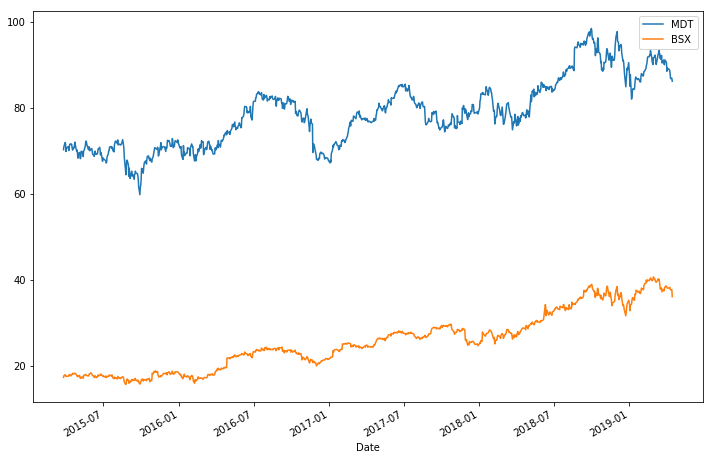

In [24]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

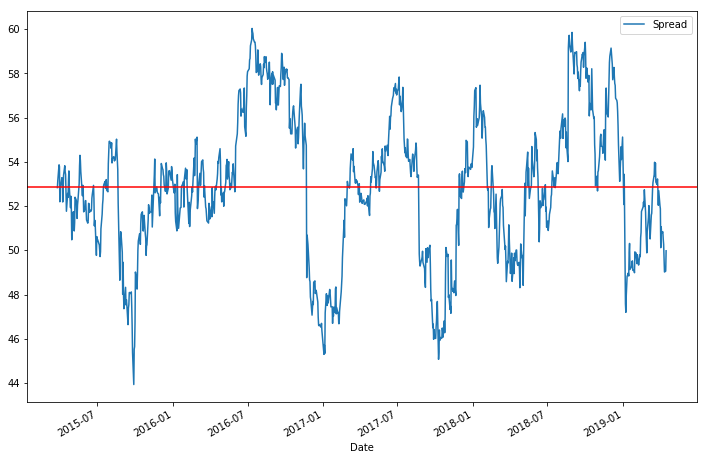

In [25]:
spread = df_tickr1['Adj Close'] - df_tickr2['Adj Close']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend();

In [26]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

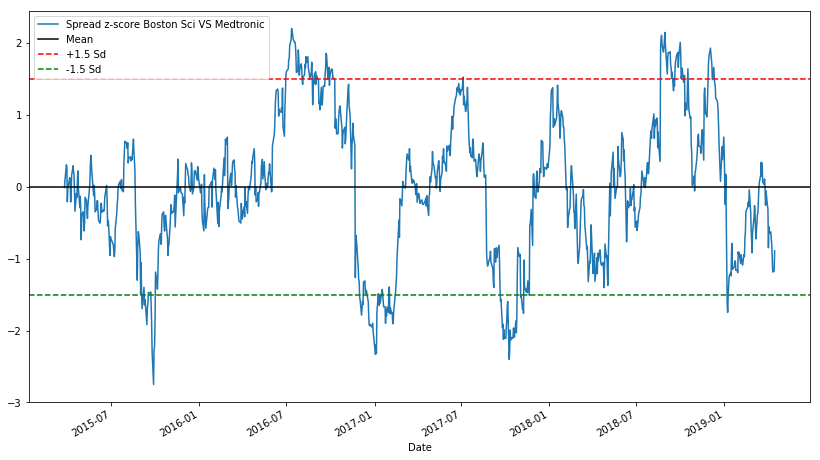

In [27]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.5, c='r', ls='--')
plt.axhline(-1.5, c='g', ls='--')
plt.legend(['Spread z-score Boston Sci VS Medtronic', 'Mean', '+1.5 Sd', '-1.5 Sd']);

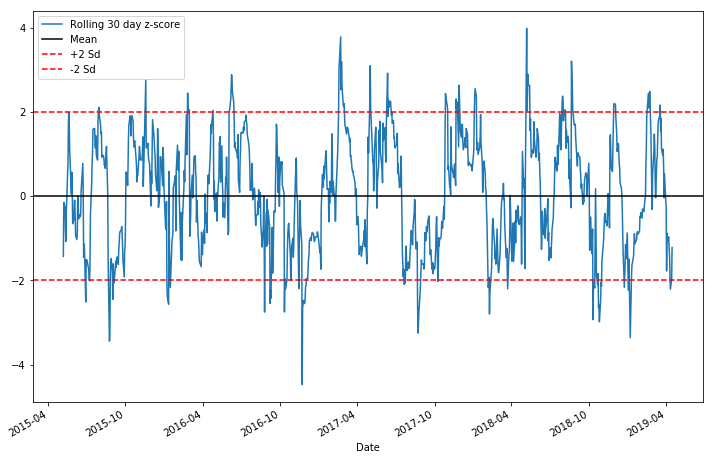

In [28]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(30).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30



zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score', 'Mean', '+2 Sd', '-2 Sd']);

In [29]:
from statsmodels.tsa.stattools import coint

In [30]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [31]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [32]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair MDT VS BSX: -3.497041328284928
Alpha value for the T-stat:  0.03265857082878934
--------------------------------------
T-stat 99%:  -3.907198802560529
T-stat 95%:  -3.3421209722468705
T-stat 90%:  -3.0486065759596945


In [33]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.       , 0.9135683],
       [0.9135683, 1.       ]])

In [34]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[62.55454317, 48.57932793],
       [48.57932793, 45.20246395]])

In [35]:
zscore_30_1

Date
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31         NaN
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
2015-04-09         NaN
2015-04-10         NaN
2015-04-13         NaN
2015-04-14         NaN
2015-04-15         NaN
2015-04-16         NaN
2015-04-17         NaN
2015-04-20         NaN
2015-04-21         NaN
2015-04-22         NaN
2015-04-23         NaN
2015-04-24         NaN
2015-04-27         NaN
2015-04-28         NaN
2015-04-29         NaN
2015-04-30         NaN
2015-05-01         NaN
2015-05-04         NaN
2015-05-05         NaN
2015-05-06         NaN
2015-05-07   -1.427267
                ...   
2019-03-06    1.184499
2019-03-07    0.425002
2019-03-08   -0.036378
2019-03-11    0.895694
2019-03-12    0.908984
2019-03-13    1.405570
2019-03-14    1.715144
2019-03-15    1.814079
2019-03-18    1.920754
2019-03-19    2.161271
2019-03-20    1.534734
2019-03-21    1.841072
2019-0